# Python for Data Analysis
In this notebook, we are going to continue on with our exposition of scientific computing with Python, in particular looking at data analysis tools in the Scipy stack. We are going to have a brief introduction to two libraries: Panda and scikit-learn.

## Pandas
Pandas - derived from 'panel data' not the cute animal :( - is a library for data analysis and manipulation. If you have used R before, you'd find some of the Pandas constructs very familiar. The main construct in Pandas is the dataframe object, which you can think of as a table where the rows are the observations and the columns are the variables/features.

## Scikit-learn
Scikit-learn is a machine learning library in Python. It implements some of the most popular machine learning algorithms as well as useful utilities for preprocessing data and validating models.

## Tutorial
This notebook is written as a tutorial on how to do a simple data analysis excercise in Python. We will be using the Boston Housing dataset which contains descriptions of houses in Boston and their corresponding prices. The task is to predict the prices from the descriptions. We start off by loading Numpy and Pandas.

In [28]:
import numpy as np
import pandas as pd

Then we load the Boston Housing dataset. This dataset is available in scikit-learn:

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

Let's check the type of the object that we loaded:

In [3]:
type(boston) # Dictionary like object

sklearn.utils.Bunch

This object is similar to a Python dictionary (the reason I know this is because I have looked at the docs and played around a bit!). We can look at its keys:

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Let's check the types of some of the values:

In [5]:
type(boston['data'])

numpy.ndarray

In [6]:
type(boston['target'])

numpy.ndarray

Since both are Numpy arrays, we can use the stuff that we learned from the last tutorial to explore more. For instance, we can look at the shape:

In [7]:
boston['data'].shape # 506 observations with 13 features each

(506, 13)

Let's explore more by printing the rest of the values:

In [8]:
print(boston['feature_names']) # Names for features

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
print(boston['DESCR']) # Description of dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now that we know what we are working with, we can store the dataset in a Pandas dataframe for further exploration and manipulation:

In [10]:
boston_df = pd.DataFrame(boston['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The `head` method in a Pandas dataframe displays the first five rows of the dataframe by default. It is a good way to take a quick look at the data. As we can see, we have 13 features, all taking numerical values. To make things more clear, we can label the columns with the feature names, to know which column corresponds to which feature:

In [11]:
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Much better! Sadly, we are still missing one thing, the prices of the houses (target values)! We can add them to the dataframe by creating a new column and assigning it the corresponding values:

In [12]:
boston_df['PRICE'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now that we have the complete dataframe, we can explore further. One easy way to do so is to look at summary statistics. We can easily do this with Pandas:

In [13]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Here, we get the count of non-missing values, the column mean, column standard deviation, the minimum, the maximum and the 25th, 50th and 75th percentiles. These give as a good picture of the statistics of the data on our hands. One thing to notice, is that each column seems to have a different mean and standard deviations. This can cause some problems when fitting a statistical/machine learning model (not always!). A good practice is to standardise the data before fitting it to a model. We will learn how to do that in Pandas. But first, let's split our data into a training and a test set. We will do a 70/30 split.

In [14]:
train = boston_df.sample(frac=0.7) # Select a random sample of rows amounting to 70% of observations
test = boston_df.drop(train.index) # Select the remaining rows as test

In [15]:
# Sanity check
print(train.shape)
print(test.shape)

(354, 14)
(152, 14)


Now that we have the split, let's standardise. To standardise a variable, we subtract it's mean and divide by its standard deviation:
$$
z = \frac{x - \mu}{\sigma}
$$
One important thing to note here is that we calculate the mean and the standard deviation on the training set only and then apply on the test set.

In [16]:
means = train.mean(axis=0)
stds = train.std(axis=0)

In [17]:
standard_train = (train - means) / stds
standard_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
323,-0.459497,-0.467555,-0.567586,-0.257056,-0.557581,-0.843645,0.153330,0.462442,-0.518304,-0.736173,0.504357,0.386117,-0.172843,-0.388189
390,0.540614,-0.467555,1.019108,-0.257056,1.167298,-0.836415,0.981595,-0.874948,1.663243,1.539199,0.780454,0.421815,0.550628,-0.754611
374,2.268217,-0.467555,1.019108,-0.257056,0.900650,-3.113970,1.091058,-1.252773,1.663243,1.539199,0.780454,0.448533,3.360987,-0.894714
455,0.209684,-0.467555,1.019108,-0.257056,1.275623,0.337791,0.598477,-0.631216,1.663243,1.539199,0.780454,-3.294042,0.688048,-0.862383
137,-0.449252,-0.467555,1.580075,-0.257056,0.534009,0.235121,1.032678,-0.911654,-0.633122,0.164370,1.240615,0.418028,0.211122,-0.539069


In [18]:
standard_test = (test - means) / stds
standard_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.501070,0.285354,-1.318009,-0.257056,-0.182607,0.410095,-0.178706,0.160421,-0.977577,-0.682140,-1.474335,0.448533,-1.083583,0.204552
2,-0.497929,-0.467555,-0.613470,-0.257056,-0.757567,1.292195,-0.328305,0.580168,-0.862759,-1.006336,-0.323933,0.404507,-1.211571,1.357704
4,-0.491675,-0.467555,-1.337251,-0.257056,-0.849227,1.237245,-0.580068,1.104242,-0.747941,-1.126408,0.090212,0.448533,-1.036429,1.519361
5,-0.497546,-0.467555,-1.337251,-0.257056,-0.849227,0.200415,-0.415875,1.104242,-0.747941,-1.126408,0.090212,0.418461,-1.052596,0.711077
7,-0.480369,0.055298,-0.495060,-0.257056,-0.299266,-0.172670,0.948757,1.050786,-0.518304,-0.592086,-1.520351,0.448533,0.825467,0.538643


## Task 1
I made a methodological mistake in the standardisation process. Can you spot it? Hint: look at the variable descriptions.

## Regression
Now let's fit a linear regression to the above data. We want to predict the price of the houses based on the other variables. Hence, we split the training dataframe to features and targets (features/labels, inputs/outputs, indepedant/depedant variables, etc...).

In [19]:
Y_train = standard_train['PRICE']
X_train = standard_train.drop('PRICE', axis=1)

We use `scikit-learn` to fit a linear regression model rather than implementing our own as in the previous tutorial:

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Create linear regression model object
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And voila! Just like that, the model is fit!!! Now we can use it to predict on new values (test values):

In [21]:
Y_test = standard_test['PRICE']
X_test = standard_test.drop('PRICE', axis=1)
Y_predicted = model.predict(X_test)

We can see how well we did by plotting the true values against the predicted values:

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

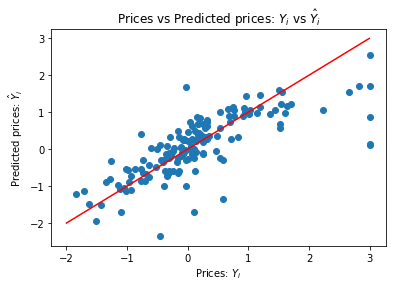

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(Y_test, Y_predicted)
xx = np.arange(-2, 3, 0.01)
plt.plot(xx, xx, c='red')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$") #Example of using LaTeX in plots

Not too shabby given that we have made a mistake in the preprocessing! To have a clearer idea on how well we did and to be able to compare to other model, we can calculate the mean sqaured error:

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predicted)
print(mse)

0.4037342994349938


Now we have a numerical value of our performance to compare to other models.

## Capstone project
Try to improve on the above results, either by having better data preprocessing or by using other models from the `scikit-learn` library (Look at the regression section [here](http://scikit-learn.org/stable/)). Note, if you choose not to standardise, you can do so for all the variables except the *price* since the mean squared error comparisons won't be valid otherwise.